# ANALISIS DE CLIENTES-INSIGHTREACH

## 1. Objetivo del análisis

## 2. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_0 = pd.read_csv(r'C:\Users\ASUS\Desktop\DATA SCIENCE-CURSE\EDA\base_datos_restaurantes_USA_v2 (nuevo).csv')# se carga archivo CSV en ruta especificada.
   

In [2]:
df_0.head() #verificación de carga exitosa del archivo CSV. vista previa de las primeras filas del DataFrame.

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


In [3]:
df_0.tail() #muestra las últimas cinco filas del DataFrame.

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
29995,4862097674,Robert,Cortez,20.0,Masculino,Houston,Alto,-3,30.82,Sí,Sí,Vegano,Sí,NaN,garciagregory@example.net,Tarjeta,5781
29996,9458262482,Michael,Holt,78.0,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,NaN,jimmy77@example.org,Efectivo,7652
29997,3412365931,Rebecca,Henry,77.0,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,NaN,NaN,Efectivo,12639
29998,8853079811,Tamara,Griffin,77.0,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,NaN,Tarjeta,1057
29999,4553644223,Tracey,Flynn,57.0,Femenino,Chicago,Bajo,1,6.96,No,Sí,Carnes,No,295.679.7926x321,NaN,Efectivo,1348


In [4]:
df_0.shape #muestra la cantidad de filas y columnas del DataFrame.


(30000, 17)

## 3. Exploración inicial (EDA)

In [5]:
df_0.columns #muestra los nombres de las columnas del DataFrame.

Index(['id_persona', 'nombre', 'apellido', 'edad', 'genero',
       'ciudad_residencia', 'estrato_socioeconomico', 'frecuencia_visita',
       'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto',
       'correo_electronico', 'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

In [6]:
df_0.dtypes #muestra los tipos de datos de cada columna en el DataFrame.
#Edad es un float64 y debe ser int64 (valor a ajustar en limpieza de datos).

id_persona                     int64
nombre                        object
apellido                      object
edad                         float64
genero                        object
ciudad_residencia             object
estrato_socioeconomico        object
frecuencia_visita              int64
promedio_gasto_comida        float64
ocio                          object
consume_licor                 object
preferencias_alimenticias     object
membresia_premium             object
telefono_contacto             object
correo_electronico            object
tipo_de_pago_mas_usado        object
ingresos_mensuales             int64
dtype: object

In [7]:
df_0.info() #da la información del Dataframe, incluyendo el índice, tipos de datos y uso de memoria.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

In [8]:
df_0.isna().sum()  # Cuenta los valores nulos en cada columna del DataFrame. similar al anterior pero reconocemos mas claro quien tienen mas 
#y si esto afecta nuestro Analisis-Por ejemplo telefonos y correos tienen muchos nulos mas del 50% que eliminarlos afectaria nuestra muestra significativamente a demas de que no es relevante.

id_persona                       0
nombre                           0
apellido                         0
edad                           101
genero                           0
ciudad_residencia                0
estrato_socioeconomico           0
frecuencia_visita                0
promedio_gasto_comida          145
ocio                             0
consume_licor                    0
preferencias_alimenticias     1403
membresia_premium                0
telefono_contacto            15166
correo_electronico           15072
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

In [9]:
df_0.duplicated().sum()  # Cuenta el número de filas duplicadas en el DataFrame.- se define que no hay duplicados exactos, por ende no hay que eliminarlos.

np.int64(0)

## 4. Limpieza de datos por categoria

### Categoría-'EDAD'

In [10]:
df_0 ['edad'].describe() #muestra estadísticas descriptivas de la columna 'edad'.

count    29899.000000
mean        49.665006
std         23.839550
min         -5.000000
25%         33.000000
50%         49.000000
75%         65.000000
max        300.000000
Name: edad, dtype: float64

In [11]:
df_0['edad'].isna().sum() #verifica si hay valores nulos en la columna 'edad'.

np.int64(101)

In [12]:
(df_0['edad'] >100).sum() #cuenta cuántos valores mayores a 100 hay en la columna 'edad'.


np.int64(110)

In [13]:
(df_0['edad'] <0).sum() #cuenta cuántos valores menores a 0 hay en la columna 'edad'.

np.int64(97)

In [14]:
edad_valida = (
    df_0['edad'].notna() &
    (df_0['edad'] >= 0) &
    (df_0['edad'] <= 100)       
)

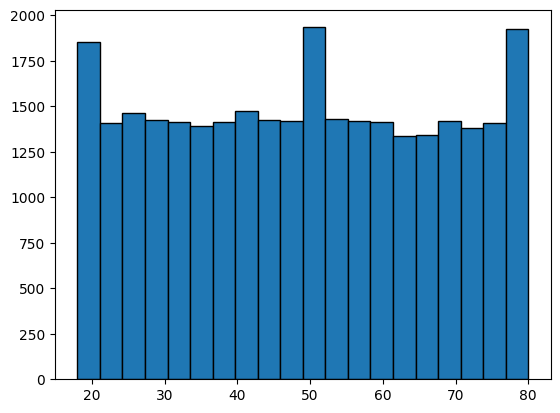

In [15]:

plt.hist(df_0.loc[edad_valida, 'edad'], bins=20, edgecolor='black')
plt.show()

In [16]:
mediana_edad = df_0.loc[edad_valida, 'edad'].median()
print ("Mediana de edad válida:", mediana_edad)

Mediana de edad válida: 49.0


In [17]:

df_0.loc[~edad_valida, 'edad'] = mediana_edad # Reemplaza los valores no válidos en la columna 'edad' con la mediana calculada anteriormente.
df_0['edad'] = df_0['edad'].round().astype('int64') # Redondea los valores en la columna 'edad' y los convierte a tipo entero (int64).

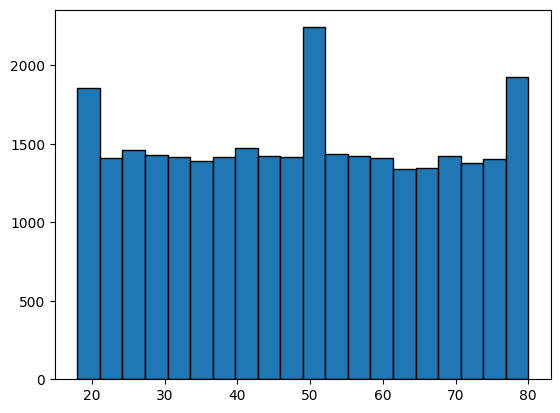

In [18]:
plt.hist(df_0['edad'], bins=20, edgecolor='black') #histograma de la columna 'edad'
plt.show()

In [19]:
#verificación de los cambios realizados en la columna 'edad'.
print(df_0.info()) 
print(df_0['edad'].describe())
print(df_0.dtypes) #verificación del tipo de dato de la columna 'edad' después de la limpieza.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       30000 non-null  int64  
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

### Categoría-Frecuencia Visitas

In [20]:
# Verificación de Valores Nulos en la categoria - 'Frecuencia_visita'
df_0['frecuencia_visita'].info() #muestra información sobre la columna 'frecuencia_visita', incluyendo el número de entradas no nulas y el tipo de datos.

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: frecuencia_visita
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [21]:
df_0['frecuencia_visita'].describe() #estadísticas descriptivas de la columna 'frecuencia_visita'.

count    30000.000000
mean         3.896133
std          2.741532
min         -3.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: frecuencia_visita, dtype: float64

In [22]:
(df_0['frecuencia_visita'] < 0).sum() #cuenta cuántos valores menores a 0 hay en la columna 'frecuencia_visita'.

np.int64(1547)

> Cantidad de valores negativos sobre el 5% tratable con imputación de la mediana.

In [23]:
frecuencia_valida = ( df_0['frecuencia_visita'].notna() & (df_0['frecuencia_visita'] >= 0) ) # Crea una máscara booleana para identificar valores válidos ( no negativos) en la columna 'frecuencia_visita'.
mediana_frecuencia = df_0.loc[frecuencia_valida, 'frecuencia_visita'].median() #Calcula la mediana de los valores válidos en la columna 'frecuencia_visita'.
print("Mediana de frecuencia de visita válida:", mediana_frecuencia)

Mediana de frecuencia de visita válida: 4.0


In [24]:
#imputa los valores no válidos en la columna 'frecuencia_visita' con la mediana calculada anteriormente.
df=df_0.copy() # Crea una copia del DataFrame df_0 para evitar modificar el original.
df.loc[~frecuencia_valida, 'frecuencia_visita'] = mediana_frecuencia  # Asigna la mediana a los valores no válidos.
df['frecuencia_visita'] = df['frecuencia_visita'].round().astype('int64') # Redondea los valores en la columna 'frecuencia_visita' y los convierte a tipo entero (int64).   

In [25]:
(df['frecuencia_visita'] < 0).sum()


np.int64(0)

In [26]:
df['frecuencia_visita'].describe()

count    30000.000000
mean         4.257100
std          2.221223
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: frecuencia_visita, dtype: float64

### Categoria-Promedio gasto comida

In [27]:
df['promedio_gasto_comida'].describe() #estadísticas descriptivas de la columna 'Promedio_gasto_comida'.

count    29855.000000
mean        32.603452
std         26.402601
min          0.000000
25%         13.290000
50%         25.510000
75%         44.400000
max        149.970000
Name: promedio_gasto_comida, dtype: float64

In [28]:
df['promedio_gasto_comida'].isna().sum() #verifica si hay valores nulos en la columna 'promedio_gasto_comida '.

np.int64(145)

> La variable promedio de gasto en comida constituye un indicador económico central del análisis. Por este motivo, los registros con valores nulos fueron excluidos, ya que la imputación de esta variable implicaría introducir supuestos no verificables y podría distorsionar las relaciones estadísticas y económicas evaluadas. El análisis se realizó únicamente sobre valores observados reales, garantizando la integridad y coherencia de los resultados. se refuerza esta decisión con el porcentaje de nulos que es menos del 0.5% del dataset.

> Creación de un nuevo dataframe (df_1) como resultado de una eliminación de nulos.

In [29]:
#eliminar valores nulos 
df_1 = df.dropna(subset=['promedio_gasto_comida'])

In [30]:
df_1['promedio_gasto_comida'].isna().sum() #verifica si hay valores nulos en la columna 'promedio_gasto_comida '.

np.int64(0)

### Categorias-Telefono y correo 
> Las variables correo electrónico y teléfono no fueron consideradas dentro del análisis estadístico, ya que no constituyen variables analíticas ni aportan información cuantitativa o categórica relevante para la generación de correlaciones, segmentaciones o inferencias económicas. Su inclusión en los modelos analíticos no genera valor estadístico y podría inducir interpretaciones erróneas. 

> No obstante, dichas variables no fueron eliminadas del dataset, pese a presentar una alta proporción de valores nulos y errores en el registro. La razón es que representan información de contacto con alto valor estratégico desde una perspectiva de negocio, particularmente para el diseño y ejecución de campañas de marketing, activaciones comerciales o acciones de fidelización por parte del cliente final.

> En este sentido, aunque podrían haberse eliminado sin afectar los resultados del análisis, se decidió preservarlas como atributos informativos, permitiendo que el cliente disponga de datos potencialmente útiles para futuras iniciativas operativas o comerciales, sin comprometer la integridad del análisis estadístico realizado.

- Visualizaciónes

In [31]:
df_1.head()

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


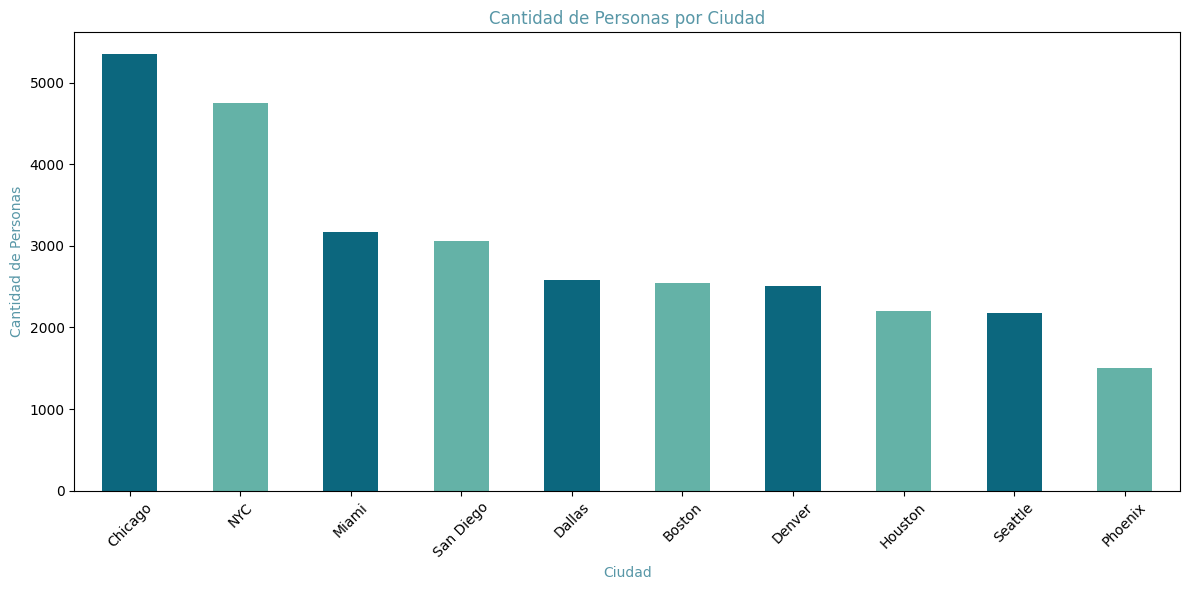

In [32]:
# Hacer un diagrama de barras que muestre la cantidad de personas que hay por ciudad.
ciudad_counts = df_1['ciudad_residencia'].value_counts() # Cuenta la cantidad de personas por ciudad en la columna 'ciudad_residencia'.
plt.figure(figsize=(12, 6))
ciudad_counts.plot(kind='bar', color= ['#0c677e','#64b2a7'])# Crea un diagrama de barras con los conteos por ciudad. kind='bar' especifica que es un diagrama de barras.
plt.xlabel('Ciudad',color='#5897a7')
plt.ylabel('Cantidad de Personas',color='#5897a7')
plt.title('Cantidad de Personas por Ciudad', color='#5897a7')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>Pese a que Miami tiene una menor cantidad de personas por ciudad posee mayor frecuencia de visitas a restaurantes y gasto promedio mayor por visita. adicional a esto miami es conocido por ser un sitio turisto por ende su gatronomia es mas internacional y ciudades como chicago son mas de estilo tradicional.

Text(0.5, 1.0, 'Cantidad de Personas por Estrato Socioeconómico')

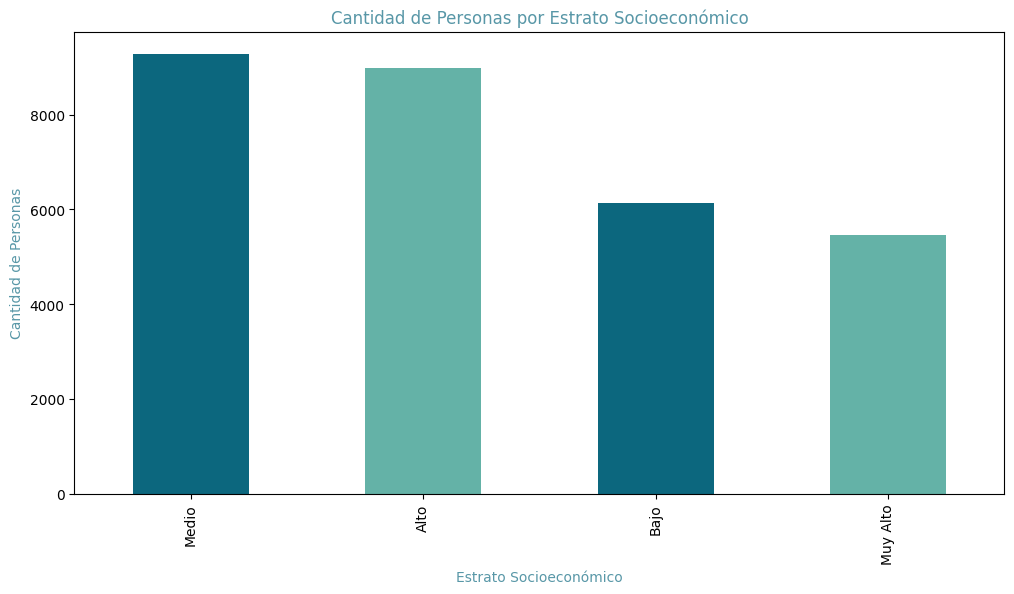

In [33]:
#listado de distribución de personas por estratos socioeconómicos
estrato_counts = df_1['estrato_socioeconomico'].value_counts()# Cuenta la cantidad de personas por estrato socioeconómico en la columna 'estrato_socioeconomico' 
plt.figure(figsize=(12, 6)) 
estrato_counts.plot(kind='bar', color= ['#0c677e','#64b2a7','#0c677e','#64b2a7','#0c677e'])# Crea un diagrama de barras con los conteos por estrato socioeconómico. kind='bar' especifica que es un diagrama de barras.
plt.xlabel('Estrato Socioeconómico',color='#5897a7')
plt.ylabel('Cantidad de Personas',color='#5897a7')
plt.title('Cantidad de Personas por Estrato Socioeconómico', color='#5897a7')
        

> la población se concentra en estratos Medio-Alto (intermedios) y menor representación en estratos bajo y muy altos. Clase media dominante y el estrato bajo representa aprox 20% del total sindo el terce grupo mas grande. 

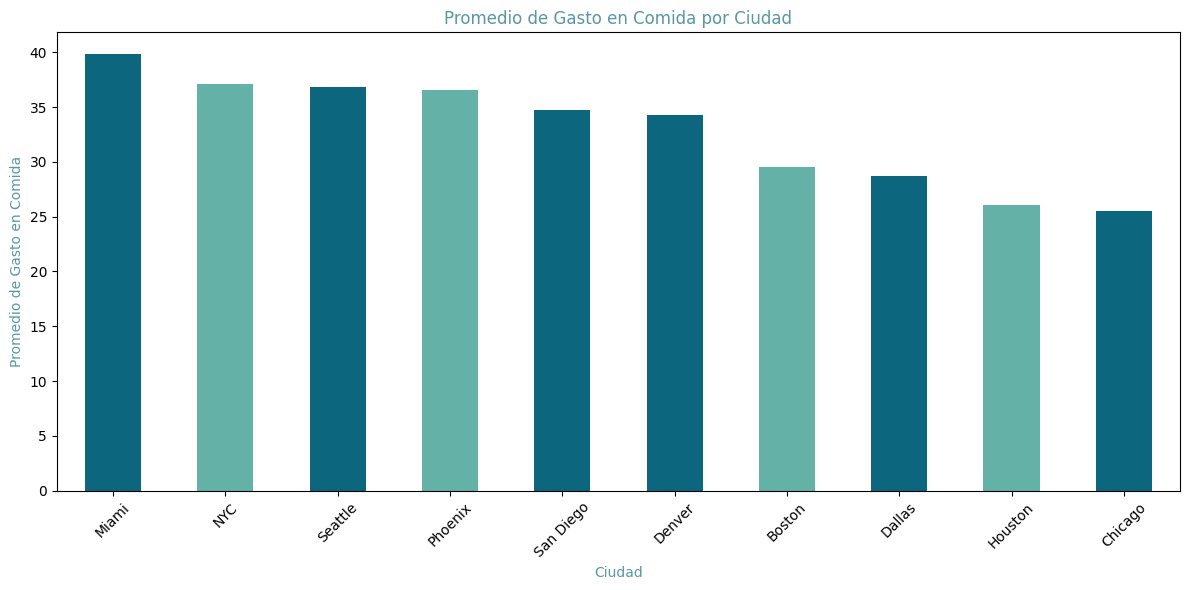

In [34]:
#grafico ciudades que mas gastan dinero en restaurantes
ciudad_gasto = df_1.groupby('ciudad_residencia')['promedio_gasto_comida'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6)) 
ciudad_gasto.plot(kind='bar', color= ['#0c677e','#64b2a7','#0c677e','#64b2a7','#0c677e'])# Crea un diagrama de barras con los promedios de gasto por ciudad. kind='bar' especifica que es un diagrama de barras.
plt.xlabel('Ciudad',color='#5897a7')
plt.ylabel('Promedio de Gasto en Comida',color='#5897a7')
plt.title('Promedio de Gasto en Comida por Ciudad', color='#5897a7')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Miami con el promedio de gasto mas alto razon por la cual se tomo como ciudad de analisis. contrastando con chicago que pese a que tiene la mayor población representa el menor gasto haciendolo menos atractivo como potencial economico para alguna propuesta.

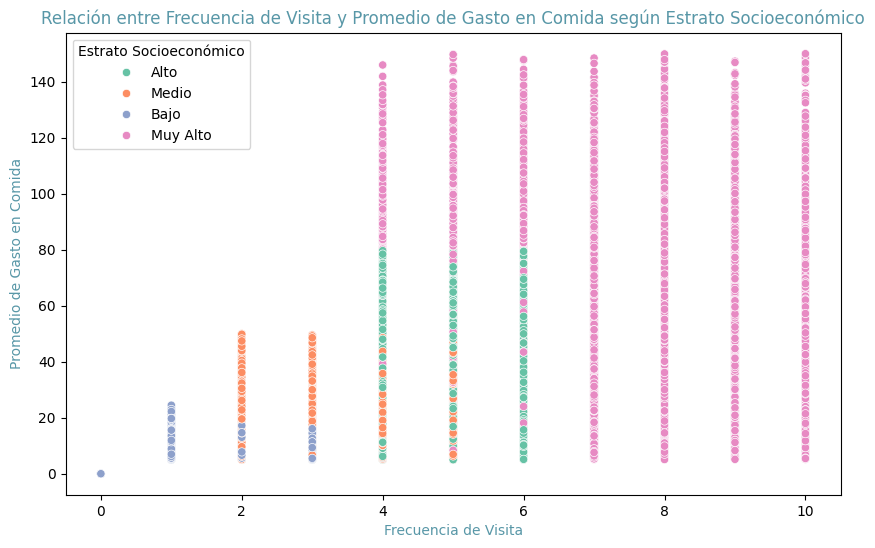

In [35]:
#Grafico relación frecuencia de visita y promedio de gasto en comida segun estrato socioeconómico
plt.figure(figsize=(10, 6))      
sns.scatterplot(data=df_1, x='frecuencia_visita', y='promedio_gasto_comida', hue='estrato_socioeconomico', palette='Set2') # Scatter plot que muestra la relación entre 'frecuencia_visita' y 'promedio_gasto_comida', con puntos coloreados según 'estrato_socioeconomico'.
plt.xlabel('Frecuencia de Visita', color='#5897a7')     
plt.ylabel('Promedio de Gasto en Comida', color='#5897a7')
plt.title('Relación entre Frecuencia de Visita y Promedio de Gasto en Comida según Estrato Socioeconómico', color='#5897a7')
plt.legend(title='Estrato Socioeconómico')  

> hallazgo nivel socieconomico muy alto gastan mas y van con mas frecuencia. en coherencia los de bajo nivel socieconomico gastan menos y frecuentan menos. los estratos alto no superan el 80 en promedio de gasto y su frecuencia esta entre el 4 y 6 visitas al mes.
el grafico muestra una segmentación definida por estrato, pues mas o menos cada estrato ocupa una zona relativamente distinta del grafico. con una correlación de que a mayor estrato socioeconomico mayor frecuencia y mayor gasto. Brecha socioeconómica: Diferencia significativa entre estratos bajo y muy alto (hasta 10x en gasto)

Insight Restaurantes
Segmentación de mercado:
Estratos bajos: Menús económicos, promociones
Estratos altos: Experiencias premium, servicio diferenciado
Programas de fidelización:
Estratos muy altos visitan hasta 10 veces → Programas VIP
Estratos bajos visitan poco → Incentivos para aumentar frecuencia
Pricing strategy:
Estratos altos toleran precios de $40-150
Estratos bajos buscan opciones bajo $25

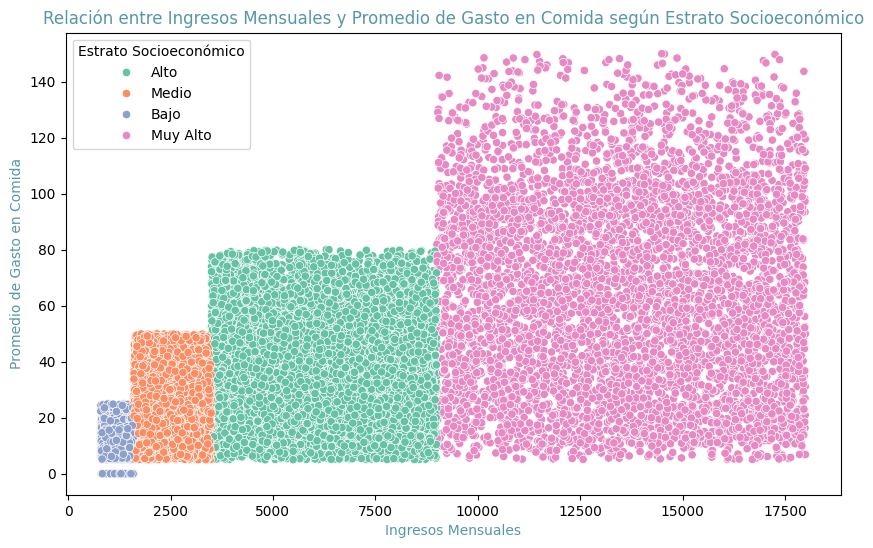

In [36]:
#grafico de dispersión entre el gasto promedio y sus ingresos mensuales
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_1, x='ingresos_mensuales', y='promedio_gasto_comida', hue='estrato_socioeconomico', palette='Set2') # Scatter plot que muestra la relación entre 'ingresos_mensuales' y 'promedio_gasto_comida', con puntos coloreados según 'estrato_socioeconomico'.
plt.xlabel('Ingresos Mensuales', color='#5897a7')   
plt.ylabel('Promedio de Gasto en Comida', color='#5897a7')
plt.title('Relación entre Ingresos Mensuales y Promedio de Gasto en Comida según Estrato Socioeconómico', color='#5897a7')
plt.legend(title='Estrato Socioeconómico')  

> Grafico representando que los estratos bajos con ingresos bajos realizan gastos entre 0-25 dolares (bajos) y asi en escalera y dimensionamiento refiriendose a que los estratos altos tienen mayor rango de gasto y los volumenes de la grafica si hacen discrepancia a que fuese una distribución poblacional real, posiblemente este dataset esta dado de datos sinteticos armado a conveniencia.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37368\1275154227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_37368\1275154227.py:3: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


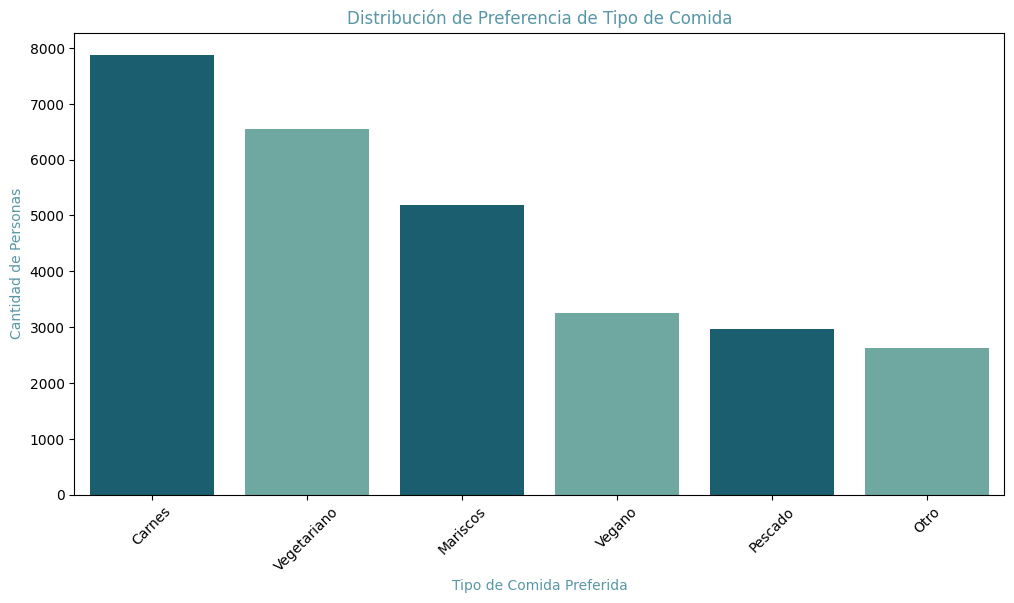

In [37]:
#grafico de distribución de preferencia de tipo de comida en todas las ciudades 
plt.figure(figsize=(12, 6))
sns.countplot(
	data=df_1,
	x='preferencias_alimenticias',
	order=df_1['preferencias_alimenticias'].value_counts().index,
	palette=['#0c677e', '#64b2a7']
) # Crea un gráfico de barras que muestra la distribución de la preferencia de tipo de comida.
plt.xlabel('Tipo de Comida Preferida', color='#5897a7')     
plt.ylabel('Cantidad de Personas', color='#5897a7')
plt.title('Distribución de Preferencia de Tipo de Comida', color='#5897a7')
plt.xticks(rotation=45)     
plt.show()

In [38]:
#perfilar los clinetes de mayora gasto en restaurantes
high_spenders = df_1[df_1['promedio_gasto_comida'] > df_1['promedio_gasto_comida'].quantile(0.9)] # Filtra los clientes cuyo gasto promedio en comida está en el percentil 90 o superior.
high_spenders.describe() #muestra estadísticas descriptivas de los clientes que gastan más en restaurantes. 

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,2.985000e+03,2985.000000,2985.000000,2985.000000,2985.000000
mean,5.519885e+09,48.573869,6.921273,92.449136,12242.180235
std,2.602911e+09,18.169609,1.937227,19.621161,3650.753694
min,1.002519e+09,18.000000,4.000000,68.280000,3501.000000
25%,3.233255e+09,33.000000,5.000000,75.780000,9893.000000
50%,5.479870e+09,49.000000,7.000000,88.430000,12694.000000
75%,7.771356e+09,64.000000,9.000000,104.100000,15154.000000
max,9.997051e+09,80.000000,10.000000,149.970000,17998.000000


In [39]:
df_1

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4862097674,Robert,Cortez,20,Masculino,Houston,Alto,4,30.82,Sí,Sí,Vegano,Sí,NaN,garciagregory@example.net,Tarjeta,5781
29996,9458262482,Michael,Holt,78,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,NaN,jimmy77@example.org,Efectivo,7652
29997,3412365931,Rebecca,Henry,77,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,NaN,NaN,Efectivo,12639
29998,8853079811,Tamara,Griffin,77,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,NaN,Tarjeta,1057


#cual ciudad es la que mas membresia pagan, siendo membresia_premium una columna binaria (1 para miembros premium, 0 para no miembros).
#definir columna binaria de membresia_premium

In [40]:
#definir columna binaria de membresia_premium
df_1.loc[:, 'membresia_premium_binaria'] = np.where(df_1['membresia_premium'] == 'Sí', 1, 0) # Crea una nueva columna 'membresia_premium_binaria' que asigna 1 si 'membresia_premium' es 'Si' y 0 en caso contrario.



C:\Users\ASUS\AppData\Local\Temp\ipykernel_37368\1110906532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:, 'membresia_premium_binaria'] = np.where(df_1['membresia_premium'] == 'Sí', 1, 0) # Crea una nueva columna 'membresia_premium_binaria' que asigna 1 si 'membresia_premium' es 'Si' y 0 en caso contrario.


Text(0.5, 0, 'Ciudad')

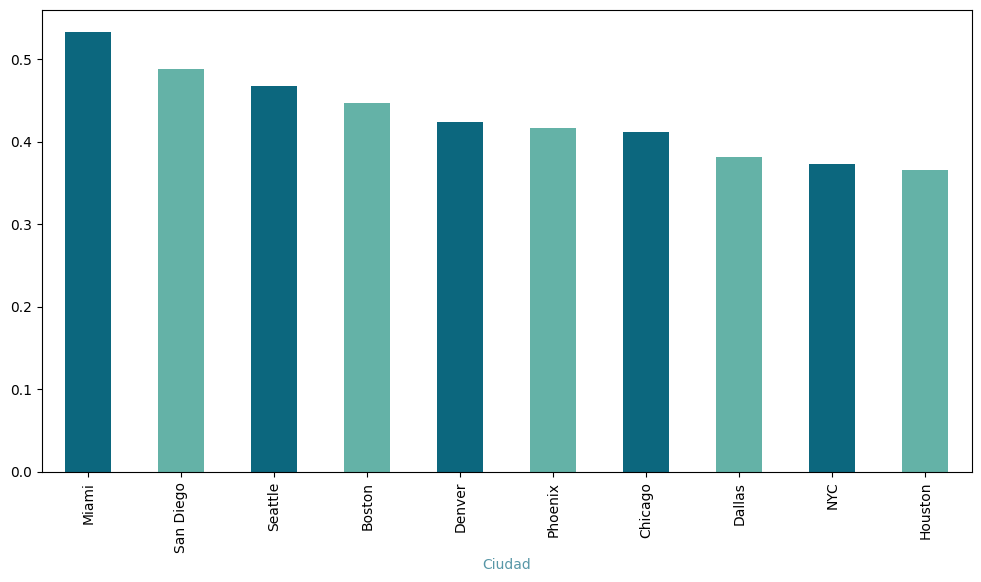

In [41]:
#cual ciudad es la que mas membresia pagan, siendo membresia_premium una columna binaria
ciudad_membresia = df_1.groupby('ciudad_residencia')['membresia_premium_binaria'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ciudad_membresia.plot(kind='bar', color= ['#0c677e','#64b2a7'])# Crea un diagrama de barras con los promedios de membresia por ciudad. kind='bar' especifica que es un diagrama de barras.
plt.xlabel('Ciudad',color='#5897a7')    

In [42]:
df_1

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales,membresia_premium_binaria
0,2550327378,Jackson,Gomez,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425,1
1,9446112038,Samantha,Soto,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374,0
2,3098363243,Terry,Adams,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110,0
3,4013002847,James,Shannon,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931,1
4,7372911048,Susan,Jones,49,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4862097674,Robert,Cortez,20,Masculino,Houston,Alto,4,30.82,Sí,Sí,Vegano,Sí,NaN,garciagregory@example.net,Tarjeta,5781,1
29996,9458262482,Michael,Holt,78,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,NaN,jimmy77@example.org,Efectivo,7652,0
29997,3412365931,Rebecca,Henry,77,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,NaN,NaN,Efectivo,12639,1
29998,8853079811,Tamara,Griffin,77,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,NaN,Tarjeta,1057,0


## 5. Filtrado por Ciudad (Análisis)

In [43]:
resumen = df_1.groupby('ciudad_residencia').agg(
    clientes=('id_persona', 'count'),
    gasto_promedio=('promedio_gasto_comida', 'mean'),
    frecuencia=('frecuencia_visita', 'mean')
).sort_values(by=['gasto_promedio', 'clientes'], ascending=False) # Agrupa los datos por 'ciudad_residencia' y calcula el número de clientes, 
# gasto promedio y frecuencia de visita, ordenando los resultados por gasto promedio de mayor a menor y luego por clientes.

print(resumen.head(10))


                   clientes  gasto_promedio  frecuencia
ciudad_residencia                                      
Miami                  3170       39.821543    4.740694
NYC                    4753       37.123200    3.991374
Seattle                2181       36.861784    4.397524
Phoenix                1503       36.544770    4.168995
San Diego              3061       34.751539    4.635413
Denver                 2510       34.264096    4.212351
Boston                 2541       29.494766    4.317198
Dallas                 2587       28.695238    4.003092
Houston                2200       26.020559    3.949545
Chicago                5349       25.531782    4.196485


> Toma de decisión ciudad MIAMI por tener el mayor gasto promedio por cliente y frecuencia de visitas. se continuará la limpieza de datos y análisis en base a esta ciudad. #insight: La ciudad de Miami destaca por tener el mayor gasto promedio por cliente y una alta frecuencia de visitas a restaurantes, lo que la convierte en un mercado atractivo para estrategias de marketing y expansión de negocios en el sector gastronómico. 


In [44]:
df_miami = df_1[df_1['ciudad_residencia'] == 'Miami'] # Filtra el DataFrame para incluir solo las filas donde 'ciudad_residencia' es 'Miami'.

In [45]:
print(df_miami)

       id_persona     nombre  apellido  edad     genero ciudad_residencia  \
0      2550327378    Jackson     Gomez    31  Masculino             Miami   
16     6139475525     Andrew      Soto    18  Masculino             Miami   
37     5358661821  Elizabeth     Brown    79   Femenino             Miami   
45     8593345998     Robert    Wilson    76  Masculino             Miami   
47     6170452916      Bruce     Young    55  Masculino             Miami   
...           ...        ...       ...   ...        ...               ...   
29953  2238067088      Kevin    Taylor    45  Masculino             Miami   
29957  1161504159    Rachael  Martinez    58   Femenino             Miami   
29958  9452988778    William    Peters    50  Masculino             Miami   
29985  8301681475     Gloria     Evans    38   Femenino             Miami   
29988  3642464047     Sherry    Wilson    35   Femenino             Miami   

      estrato_socioeconomico  frecuencia_visita  promedio_gasto_comida ocio

In [46]:
df_miami.isnull().sum()  # Cuenta los valores nulos en cada columna del DataFrame filtrado para Miami.


id_persona                      0
nombre                          0
apellido                        0
edad                            0
genero                          0
ciudad_residencia               0
estrato_socioeconomico          0
frecuencia_visita               0
promedio_gasto_comida           0
ocio                            0
consume_licor                   0
preferencias_alimenticias     146
membresia_premium               0
telefono_contacto            1592
correo_electronico           1578
tipo_de_pago_mas_usado          0
ingresos_mensuales              0
membresia_premium_binaria       0
dtype: int64

In [47]:
df_miami.shape  # Muestra la cantidad de filas y columnas del DataFrame filtrado para Miami.

(3170, 18)

##6. Visualizaciones (Apartado del AVANCE #3)

In [48]:
vars_corr = df_miami[
    ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']
]
corr_matrix = vars_corr.corr()  # Calcula la matriz de correlación para las variables seleccionadas.
print(corr_matrix)  # Muestra la matriz de correlación.

                           edad  frecuencia_visita  promedio_gasto_comida  \
edad                   1.000000          -0.016003              -0.003376   
frecuencia_visita     -0.016003           1.000000               0.538743   
promedio_gasto_comida -0.003376           0.538743               1.000000   
ingresos_mensuales    -0.016494           0.748916               0.630609   

                       ingresos_mensuales  
edad                            -0.016494  
frecuencia_visita                0.748916  
promedio_gasto_comida            0.630609  
ingresos_mensuales               1.000000  


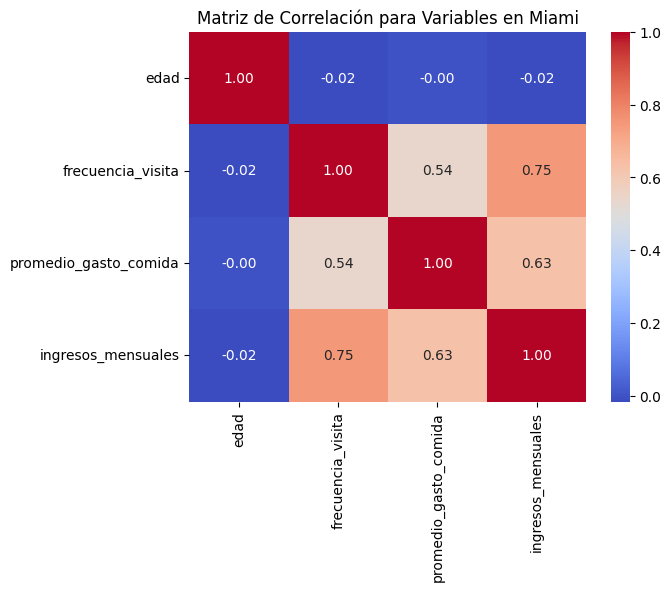

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Variables en Miami') 
plt.show()

In [50]:
df_1["preferencias_alimenticias"].value_counts(dropna=False)  # Cuenta los valores únicos en la columna "preferencias_alimenticias", incluyendo NaN.

preferencias_alimenticias
Carnes         7884
Vegetariano    6555
Mariscos       5186
Vegano         3246
Pescado        2969
Otro           2618
NaN            1397
Name: count, dtype: int64

membresia_premium_binaria    1.000000
edad                        -0.011081
frecuencia_visita            0.585991
promedio_gasto_comida        0.487836
ingresos_mensuales           0.657970
Name: membresia_premium_binaria, dtype: float64


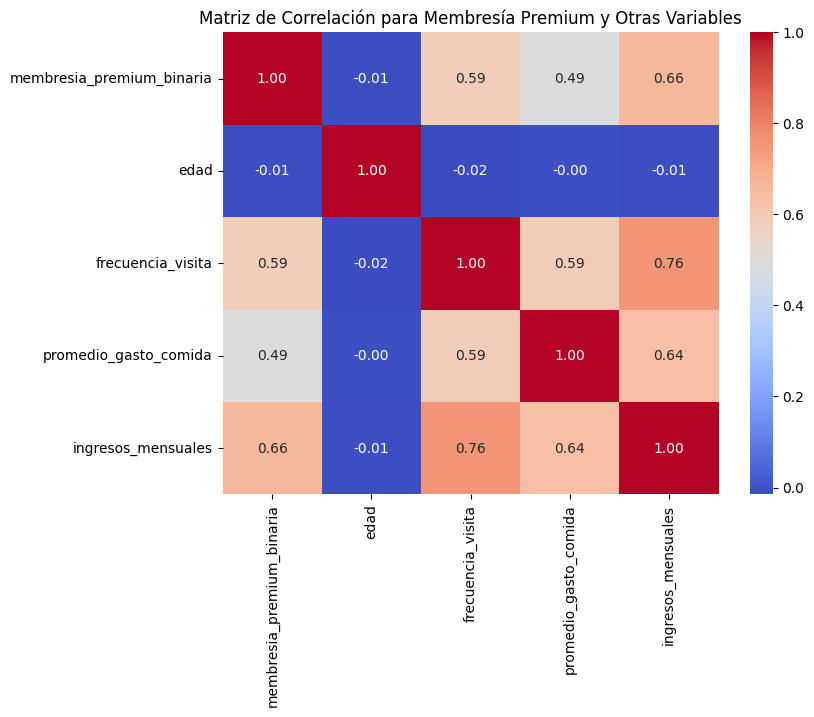

In [51]:
#correlación de membresia premium con otras variables
corr_membresia = df_1[['membresia_premium_binaria', 'edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']].corr()
print(corr_membresia['membresia_premium_binaria'])  # Muestra la correlación de la columna 'membresia_premium_binaria' con las otras variables seleccionadas.       
# graficar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_membresia, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Membresía Premium y Otras Variables')
plt.show()